# Filtering data based on QC parameters

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
... reading from cache file cache/Users-brendamelano-Desktop-Reprogramming_Osteosarcoma-Perturb_seq_analysis-OS833-OS833_pert.h5ad


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/_settings.py:450: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


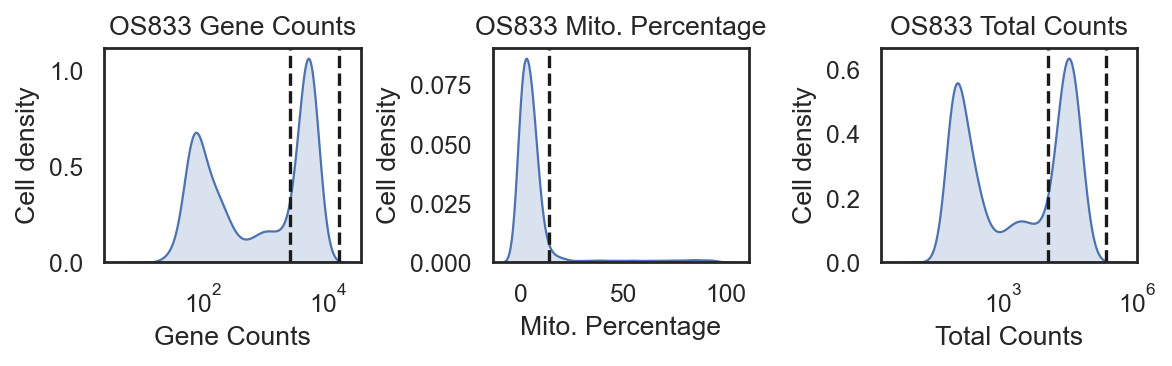

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:554: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["gene_count_corr"] = np.round(


Normalized count data: X, spliced, unspliced.


/var/folders/lt/nhcx288j6jjfg45n3bhh1mjh0000gn/T/ipykernel_80047/1303908533.py:126: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html 

    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    215 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    172 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['n_counts', 'pct_counts_mt', 'ccdifference']
    sparse input is densified and may lead to high memory use


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:21)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


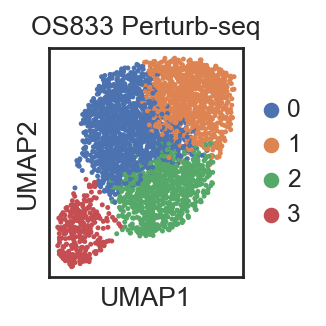

In [5]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import anndata as AnnData
import scrublet as scr
import cellrank as cr
import seaborn as sns
import scvelo as scv
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib
import networkx
import fsspec
import igraph
import scvi
import h5py
import desc 
import umap
import h5py
import os


sc.set_figure_params(figsize=(2.2, 2.2))
plt.rcParams.update({'font.size': 10}) 
sc.settings.verbosity = 3 
%load_ext rpy2.ipython
%matplotlib inline     
np.random.seed(42)


# Reading in H5 file
# Contains the cutoff at 9k cells
#adata = sc.read_10x_h5('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Perturb_seq_analysis/OS833/filtered_feature_bc_matrix.h5')

# Reading in the loom file
adata = scv.read('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Perturb_seq_analysis/OS833/OS833_pert.loom', cache = True)


# Making the var names unique
adata.var_names_make_unique()


# Filtering as is done in Seurat
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'


# Computing mitochondrial percentage
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


# Computing mitochondrial percentage
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


# Data for the variables
variables = [
    ('n_genes_by_counts', [(15000, '--'), (2500, '--')]),
    ('pct_counts_mt', [(14, '--')]),
    ('total_counts', [(10000, '--'), (200000, '--')])
]


# Dictionary for new titles
titles = {
    'n_genes_by_counts': 'Gene Counts',
    'pct_counts_mt': 'Mito. Percentage',
    'total_counts': 'Total Counts'
}


# Setting the theme without gridlines
sns.set_theme(style="white")


# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))


# Iterate over the variables and their respective lines to plot
for ax, (var, lines) in zip(axes, variables):
    sns.kdeplot(data=adata.obs, x=var, fill=True, alpha=0.2, ax=ax,
                log_scale=True if var != 'pct_counts_mt' else False)
    for line, style in lines:
        ax.axvline(x=line, color='k', linestyle=style)
    ax.set_title(f"OS833 {titles[var]}")  # Simpler title without extra text
    ax.set_xlabel(titles[var])  # Optionally keep the x-label as the new title
    ax.set_ylabel("Cell density")


# Adjust layout to prevent overlap
plt.tight_layout()


# Save the figure as SVG
plt.savefig("/Users/brendamelano/Desktop/OS833_perturb_filtering.svg")


# Show the plot
plt.show()


# Filtering the adata set based on total counts, genes and mitochondrial percentage
adata = adata[(adata.obs['total_counts'] >= 10000) &
                        (adata.obs['total_counts'] <= 200000) &
                        (adata.obs['n_genes_by_counts'] >= 2500) &
                        (adata.obs['n_genes_by_counts'] < 15000) & 
                        (adata.obs['pct_counts_mt'] < 14)
                        ]


# weren't the samples filtered in seurat? check which additional cells and genes are filtered out here
#scv.pp.filter_genes(adata, min_shared_counts=20)


# Normalizing the cells by all counts across all the genes
scv.pp.normalize_per_cell(adata)


# filtering the dataset to only keep the most variable genes
# this is redundant to selecting highly variable genes
#scv.pp.filter_genes_dispersion(adata, n_top_genes=1500)
# previously at 1500

# make sure that the log transformation is where it belongs in this preprocessing sequence
scv.pp.log1p(adata)

# making the adata copy below might have to go before the log transformation


# preserving the counts
adata.layers["counts"] = adata.X.copy() 


# freezing the data in raw
adata.raw = adata


# creating a df with the indexes (CellIDs from the adata object)
sample_one_index = pd.DataFrame(adata.obs.index)


# Selecting highly variable genes
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=7000, #1500
    subset=True,
    layer="counts"
)


genes = adata.var.index.values


## Cell-cycle regression


# reading in cell cycle genes in case I want to regress on that
cell_cycle_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/scvi/regev_lab_cell_cycle_genes.txt')]


# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]


cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]


sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

adata.obs['ccdifference'] = adata.obs['S_score'] - adata.obs['G2M_score']

# Linear dimensionality reduction
#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata.raw = adata

# Filtering the data based on highly variable genes
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['n_counts', 'pct_counts_mt', 'ccdifference'])
#sc.pp.scale(adata, max_value=10)


sc.tl.pca(adata, svd_solver='arpack')


# Computing nearest neighbors
sc.pp.neighbors(adata, n_neighbors=18, n_pcs=15)


sc.tl.umap(adata)


sc.tl.leiden(adata, resolution = 0.33)


# Create a figure and a set of subplots
fig, ax = plt.subplots()


# Plot the UMAP
sc.pl.umap(
    adata,
    color=["leiden"],
    title="OS833 Perturb-seq",
    size=20,
    show=False,  # Prevents the immediate display of the plot
    ax=ax  # Directs the plot to the axes object created earlier
)

# Use tight_layout to adjust the spacing
plt.tight_layout()


# Save the plot as an SVG file
#plt.savefig("/Users/brendamelano/Desktop/OS833_perturbseq_umap_plot.svg", format='svg')


# After saving, you can also display the plot if you wish
plt.show()

# GSEA

computing score 'Subtype_B_score'
    finished: added
    'Subtype_B_score', score of gene set (adata.obs).
    247 total control genes are used. (0:00:00)


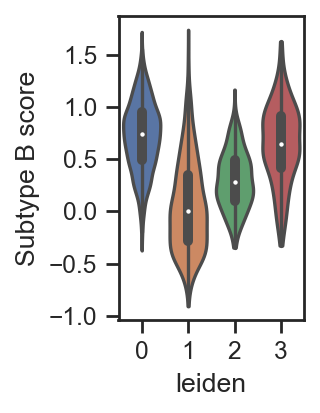

computing score 'Subtype_C_score'
    finished: added
    'Subtype_C_score', score of gene set (adata.obs).
    305 total control genes are used. (0:00:00)


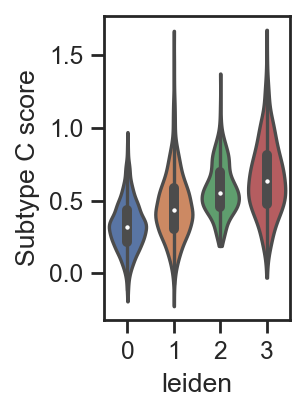

computing score 'Subtype_A_score'
    finished: added
    'Subtype_A_score', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score 'Subtype_B_score'
    finished: added
    'Subtype_B_score', score of gene set (adata.obs).
    247 total control genes are used. (0:00:00)
computing score 'Subtype_C_score'
    finished: added
    'Subtype_C_score', score of gene set (adata.obs).
    305 total control genes are used. (0:00:00)


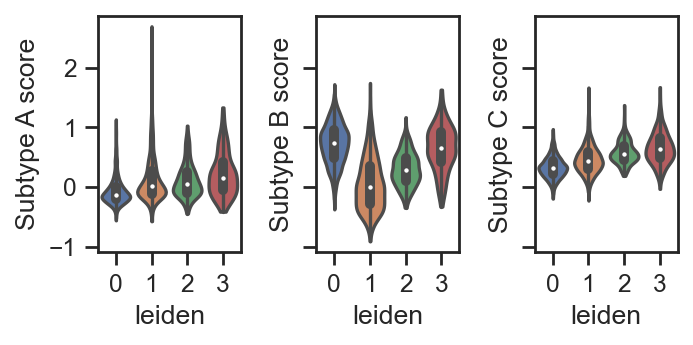

In [6]:
# reading in gene lists for gsea
Subtype_A_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/gmt_files/Subtype_A_module.csv')]


adata.var_names_make_unique()


# keeping only genes that appear in the adata
Subtype_A_genes = [x for x in Subtype_A_genes if x in adata.var_names]



# reading in gene lists for gsea
subtype_B_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/gmt_files/Subtype_B_module.csv')]


# keeping only genes that appear in the adata
subtype_B_genes = [x for x in subtype_B_genes if x in adata.var_names]


# Computing gsea
sc.tl.score_genes(adata, subtype_B_genes, ctrl_size=50, gene_pool=None, n_bins=25, 
                  score_name='Subtype_B_score', random_state=0, copy=False, use_raw=None)

# Plotting subtype B violin plot
sc.pl.violin(adata, ['Subtype_B_score'], groupby='leiden', stripplot=False, inner='box', 
             ylabel = 'Subtype B score')

# reading in gene lists for gsea
subtype_C_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/gmt_files/Subtype_C_module.csv')]


adata.var_names_make_unique()


# keeping only genes that appear in the adata
subtype_C_genes = [x for x in subtype_C_genes if x in adata.var_names]


# Computing gsea
sc.tl.score_genes(adata, subtype_C_genes, ctrl_size=50, gene_pool=None, n_bins=25, 
                  score_name='Subtype_C_score', random_state=0, copy=False, use_raw=None)

sc.pl.violin(adata, ['Subtype_C_score'], groupby='leiden', stripplot=False, inner='box', 
             ylabel = 'Subtype C score')

genes_lists = [Subtype_A_genes, subtype_B_genes, subtype_C_genes]
score_names = ['Subtype_A_score', 'Subtype_B_score', 'Subtype_C_score']

# Making variable names unique
adata.var_names_make_unique()

# Compute GSEA scores and keep only genes present in 'adata'
for genes, score_name in zip(genes_lists, score_names):
    valid_genes = [gene for gene in genes if gene in adata.var_names]
    sc.tl.score_genes(adata, valid_genes, ctrl_size=50, gene_pool=None, n_bins=25, 
                      score_name=score_name, random_state=0, copy=False, use_raw=None)

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(4.5, 2.3), sharey=True)

# Plotting each violin plot in a subplot
for i, score_name in enumerate(score_names):
    sc.pl.violin(adata, [score_name], groupby='leiden', stripplot=False, inner='box',
                 ylabel=score_name.replace('_', ' '), ax=axes[i], show=False)

# Adjust the layout
plt.tight_layout()

# Save the figure as an SVG file
#plt.savefig('/Users/brendamelano/Desktop/OS742violin_plots.svg', format='svg')

# Reading in the mol_info data from wynton

In [6]:
# For loom files
adata.obs.index = adata.obs.index.str.replace('OS833_pert:', '').str.replace('x', '') + '-1'


# Reading in the macthed cell barcodes and guides that were generated in wynton
molecular_data = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Perturb_seq_analysis/OS833/OS833_molecular_data.csv', index_col=0) 


# Keep only the 'feature_ids' and 'cell_barcodes' columns
molecular_data = molecular_data[['feature_ids', 'cell_barcodes']]


# Removing the b'' string
molecular_data['feature_ids'] = molecular_data['feature_ids'].str.strip("b''")


molecular_data['feature_ids'] = molecular_data['feature_ids'].str.replace(r'(-1i|-2i)$', '', regex=True)

# removing the b'' string from cell barcodes
molecular_data['cell_barcodes'] = molecular_data['cell_barcodes'].str.strip("b''")
# Remove duplicate rows across the entire DataFrame
molecular_data_unique = molecular_data.drop_duplicates()

molecular_data_unique['cell_barcodes'] = molecular_data_unique['cell_barcodes'].apply(lambda x: f"{x}-1")


molecular_data_unique = molecular_data_unique.set_index('cell_barcodes')

adata.obs = adata.obs.assign(cell_barcode=adata.obs.index)

adata.obs['Gene'] = "NT-ctrl"

for barcode in molecular_data_unique.index:
    if barcode in adata.obs.index:
        # If barcode exists in AnnData, add/update gene info in .obs
        # Example: Add a concatenated string of genes to a new column, handling duplicates
        genes = molecular_data_unique.loc[barcode, 'feature_ids']
        gene_str = ', '.join(genes) if isinstance(genes, pd.Series) else genes
        adata.obs.at[barcode, 'Gene'] = gene_str
    else:
        # If barcode does not exist, add a new entry (optional, depends on your analysis needs)
        # You might need to handle adding new cells to `.X` or other attributes depending on your data structure
        genes = 'NT-ctrl'
        
        
# Filter observations where 'Gene' column does not contain a comma
adata = adata[~adata.obs['Gene'].str.contains(',')].copy()


# Convert 'feature_ids' column to string
#adata['feature_ids'] = adata['feature_ids'].astype(str)

# Filter rows where 'feature_ids' column contains the string "LT"
#filtered_data = merged_data[merged_data['feature_ids'].str.contains("LT", na=False)]



# Define a function that replaces any string containing 'control' with 'control'
def replace_with_control(gene_string):
    if 'control' in gene_string:
        return 'control'
    else:
        return gene_string

# Apply the function to the 'Gene' column
adata.obs['Gene'] = adata.obs['Gene'].apply(replace_with_control)


# Define a function that replaces any string containing 'control' with 'control'
def replace_with_control(gene_string):
    if 'NT-ctrl' in gene_string:
        return 'NT-ctrl'
    else:
        return gene_string

# Apply the function to the 'Gene' column
adata.obs['Gene'] = adata.obs['Gene'].apply(replace_with_control)

# Define a function that replaces any string containing 'control' with 'control'
def replace_with_control(gene_string):
    if 'control' in gene_string:
        return 'NT-ctrl'
    else:
        return gene_string

# Apply the function to the 'Gene' column
adata.obs['Gene'] = adata.obs['Gene'].apply(replace_with_control)

kd_counts = adata.obs['Gene'].value_counts()

# Printing the counts
print(kd_counts)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


NT-ctrl    2057
IRF1        186
NFE2L3      158
TCF4        107
NFKB2       107
TSHZ2        81
JUN          78
NR0B1        73
STAT1        70
JUNB          7
Name: Gene, dtype: int64


# RNA velocity

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on distances
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/12 cores)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/497 [00:00<?, ?gene/s]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:724: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:02:26) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/3461 [00:00<?, ?cells/s]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


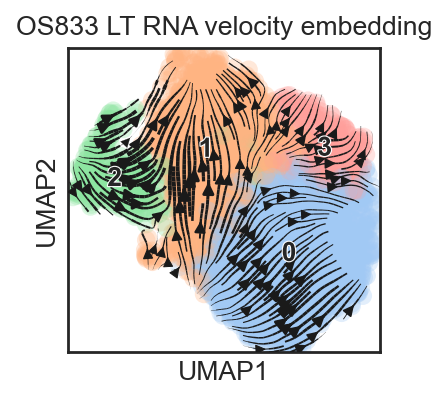

In [7]:
# computing the moments
scv.pp.moments(adata, mode = 'distances')
 

# recovering dynamics
scv.tl.recover_dynamics(adata)

# inferring the DYNAMIC velocities
scv.tl.velocity(adata, mode='dynamical')


# computing the velocity graph
scv.tl.velocity_graph(adata)

# creating a dataframe with the cluster IDs
clusters = pd.DataFrame(adata.obs['leiden'].astype('int64').values)

# Define the number of clusters
n_clusters = len(clusters[0].unique())

# Define a color palette with a limited number of colors
colors = sns.color_palette('pastel', n_clusters)

# Create a dictionary that maps each cluster ID to a color from the palette
cluster_colors = dict(zip(sorted(clusters[0].unique()), colors))

# Map the cluster IDs to their corresponding colors
adata.uns['ClusterName_colors'] = [cluster_colors[c] for c in clusters[0]]

# Set the plot style to 'white' to remove grid lines
sns.set_style('white')


# Plot the stream with the discrete color legend
scv.pl.velocity_embedding_stream(adata, basis='umap', color='leiden', 
                                 palette=colors, title = 'OS833 LT RNA velocity embedding',
                                frameon = True)

# Subtype labeling

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


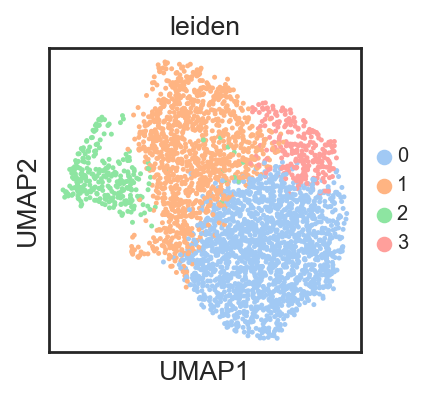

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


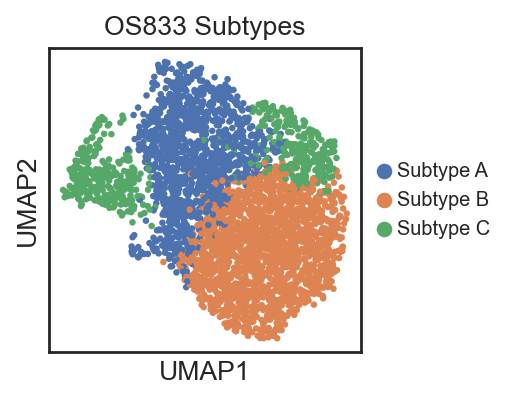

In [8]:
sc.pl.umap(adata, color=['leiden'], legend_fontsize=9, size = 20)

adata.obs['leiden'] = adata.obs['leiden'].astype('category')

adata.obs['leiden'][adata.obs['leiden']=='3']='2'


# adding labels for trajectory subtype
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = { 'Subtype A': ['1'],  'Subtype B': ['0'], 'Subtype C':['2']}


# Initialize empty column in cell metadata
adata.obs['Subtype'] = np.nan


# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.leiden).isin(cell_dict[i])
    adata.obs.loc[ind,'Subtype'] = i

    
# creating a dataframe with the cluster IDs
subtypes = pd.DataFrame(adata.obs['Subtype'].values)

# Define the number of clusters
n_subtypes = len(subtypes[0].unique())

# Define a color palette with a limited number of colors
colors = sns.color_palette('pastel', n_subtypes)

# Create a dictionary that maps each cluster ID to a color from the palette
#subtype_colors = dict(zip(sorted(subtypes[0].unique()), colors))

# Map the cluster IDs to their corresponding colors
#adata.uns['subtype_colors'] = [subtype_colors[c] for c in subtypes[0]]

sc.pl.umap(adata, color=['Subtype'], legend_fontsize=9, title = "OS833 Subtypes") #, palette = subtype_colors

# saving the adata file with the cluster ids
#adata.write("/Users/brendamelano/Desktop/OS152_adata_labeled.h5ad")

#adata = sc.read("/Users/brendamelano/Desktop/OS152_adata_labeled.h5ad")

# Subtype and target dataframe

In [15]:
# Extracting the required columns
df = adata.obs[['Gene', 'Subtype']]


# Creating one-hot encoding for the Gene column
one_hot = pd.get_dummies(df['Gene'])
df = df.join(one_hot)



# Adding a 'cell_line' column with all values as 'OS384'
df['cell_line'] = 'OS833'

df = df.drop(columns=['Gene'])

df

,Subtype,IRF1,JUN,JUNB,NFE2L3,NFKB2,NR0B1,NT-ctrl,STAT1,TCF4,TSHZ2,cell_line
CellID,,,,,,,,,,,,
AACAAAGGTACCCAGC-1,Subtype B,0,0,0,1,0,0,0,0,0,0,OS833
AACAACCTCAGCGCGT-1,Subtype B,0,0,0,0,0,0,0,0,1,0,OS833
AAAGGTAGTAAGATAC-1,Subtype A,0,0,0,0,0,0,1,0,0,0,OS833
AAAGTGATCATTCTTG-1,Subtype B,0,0,0,0,0,0,1,0,0,0,OS833
AAACGAATCTACACTT-1,Subtype A,0,0,0,0,0,1,0,0,0,0,OS833
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGTCAGACAAA-1,Subtype B,0,0,0,0,0,0,1,0,0,0,OS833
TTTGTTGAGAATTCAG-1,Subtype C,0,0,0,0,0,0,1,0,0,0,OS833
TTTCACATCAAGTAAG-1,Subtype B,1,0,0,0,0,0,0,0,0,0,OS833


In [16]:

# Saving the DataFrame
df.to_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Perturb_seq_analysis/OS833/OS833_Subtype_target_for_modeling.csv')


# Reading the DataFrame back in to ensure it was saved correctly
loaded_df = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Perturb_seq_analysis/OS833/OS833_Subtype_target_for_modeling.csv', index_col='CellID')

loaded_df

,Subtype,IRF1,JUN,JUNB,NFE2L3,NFKB2,NR0B1,NT-ctrl,STAT1,TCF4,TSHZ2,cell_line
CellID,,,,,,,,,,,,
AACAAAGGTACCCAGC-1,Subtype B,0,0,0,1,0,0,0,0,0,0,OS833
AACAACCTCAGCGCGT-1,Subtype B,0,0,0,0,0,0,0,0,1,0,OS833
AAAGGTAGTAAGATAC-1,Subtype A,0,0,0,0,0,0,1,0,0,0,OS833
AAAGTGATCATTCTTG-1,Subtype B,0,0,0,0,0,0,1,0,0,0,OS833
AAACGAATCTACACTT-1,Subtype A,0,0,0,0,0,1,0,0,0,0,OS833
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGTCAGACAAA-1,Subtype B,0,0,0,0,0,0,1,0,0,0,OS833
TTTGTTGAGAATTCAG-1,Subtype C,0,0,0,0,0,0,1,0,0,0,OS833
TTTCACATCAAGTAAG-1,Subtype B,1,0,0,0,0,0,0,0,0,0,OS833


# Testing KD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


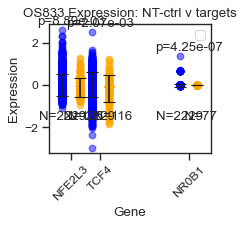

In [3]:
###  MUST REMOVE SCALING AND INCREASE THE NUMBER OF VARIABLE GENES USED TO 5-6K


valid_genes = [gene for gene in kd_counts.index if gene in adata.var_names]

p_values = []

# Iterate over each valid gene to plot
for i, gene in enumerate(valid_genes):
    adata_ctrl = adata[adata.obs['Gene'] == 'NT-ctrl']
    adata_gene = adata[adata.obs['Gene'] == gene]

    ctrl_expression = adata_ctrl[:, gene].X.flatten()
    gene_expression = adata_gene[:, gene].X.flatten()

    control_mean = np.mean(ctrl_expression)
    control_std = np.std(ctrl_expression)
    gene_mean = np.mean(gene_expression)
    gene_std = np.std(gene_expression)

    # Perform Welch's t-test
    t_stat, p_value = ttest_ind(ctrl_expression, gene_expression, equal_var=False)
    p_values.append(p_value)

# Adjust p-values for multiple comparisons using the Benjamini-Hochberg procedure
from statsmodels.stats.multitest import multipletests
rejections, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')


# Assuming valid_genes and corrected_p_values are defined from previous steps
significance_threshold = 0.05

# Get the indices of significant genes for plotting purposes
significant_indices = [i for i, p_val in enumerate(corrected_p_values) if p_val < significance_threshold]


from scipy.stats import ttest_ind

plt.figure(figsize=(3, 3))

# Plot only significant genes
for i in significant_indices:
    # Indices and gene names correspond to significant genes only
    gene = valid_genes[i]
    adata_ctrl = adata[adata.obs['Gene'] == 'NT-ctrl']
    adata_gene = adata[adata.obs['Gene'] == gene]

    ctrl_expression = adata_ctrl[:, gene].X.flatten()
    gene_expression = adata_gene[:, gene].X.flatten()

    control_mean = np.mean(ctrl_expression)
    control_std = np.std(ctrl_expression)
    gene_mean = np.mean(gene_expression)
    gene_std = np.std(gene_expression)
    n_control = len(ctrl_expression)
    n_gene = len(gene_expression)

    # Perform Welch's t-test
    t_stat, p_value = ttest_ind(ctrl_expression, gene_expression, equal_var=False)

    # Create bars for the mean expression levels
    plt.bar(i - 0.3, control_mean, yerr=control_std, capsize=5, width=0.4, color='blue', label='NT-ctrl' if i == 0 else "")
    plt.bar(i + 0.3, gene_mean, yerr=gene_std, capsize=5, width=0.4, color='orange', label=gene if i == 0 else "")

    # Add individual data points
    plt.scatter([i - 0.3] * n_control, ctrl_expression, color='blue', alpha=0.5)
    plt.scatter([i + 0.3] * n_gene, gene_expression, color='orange', alpha=0.5)

    # Annotate the plot with p-values offset from the highest point in the plot
    y_offset = 0.1  # Adjust this value as needed to offset the p-value text
    max_expression = max(max(ctrl_expression), max(gene_expression))
    plt.text(i, max_expression + y_offset, f'p={p_value:.2e}', ha='center', va='bottom')
    

import matplotlib.pyplot as plt



# Add cell count information at the bottom of the plot
for i in significant_indices:
    gene = valid_genes[i]
    n_control = sum(adata.obs['Gene'] == 'NT-ctrl')
    n_gene = sum(adata.obs['Gene'] == gene)
    plt.text(i - 0.3, -1.2, f'N={n_control}', ha='center', va='top')
    plt.text(i + 0.3, -1.2, f'  N={n_gene}', ha='center', va='top')

# Set the x-ticks to correspond to significant genes only
plt.xticks(significant_indices, [valid_genes[i] for i in significant_indices], rotation=45)

# Set labels and title
plt.xlabel('Gene')
plt.ylabel('Expression')
plt.legend()
plt.title('OS833 Expression: NT-ctrl v targets')

# Adjust layout
plt.tight_layout()

# Save the plot as SVG
plt.savefig('/Users/brendamelano/Desktop/OS833_Target_Gene_KD_test.svg', format='svg')

plt.show()

# After saving, return the path to the saved SVG file
#plot_path = '/mnt/data/plot.svg'
#plot_path


In [7]:
from scipy.stats import mannwhitneyu

In [8]:
def plot_gene_expression(adata, gene, output_path=None):
    """
    Generates box plot and density plot for a given gene using the specified AnnData object.

    Parameters:
    adata (AnnData): The annotated data matrix.
    gene (str): Target gene to plot.
    output_path (str): Optional path to save the plots as SVG files. If None, plots are displayed instead.
    """
    # Check if the gene is present in the dataset
    if gene not in adata.var_names:
        raise ValueError(f"Gene '{gene}' not found in the AnnData object.")
    
    # Separate the control and gene-specific data
    adata_ctrl = adata[adata.obs['Gene'] == 'NT-ctrl']
    adata_gene = adata[adata.obs['Gene'] == gene]

    # Extract expression values for the target gene
    ctrl_expression = adata_ctrl[:, gene].X.flatten()
    gene_expression = adata_gene[:, gene].X.flatten()

    # Ensure non-empty data
    if len(ctrl_expression) == 0 or len(gene_expression) == 0:
        raise ValueError("Expression data is empty for one of the groups.")
    
    # Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(ctrl_expression, gene_expression, alternative='two-sided')

    # Prepare data for box plot
    data_to_plot = [ctrl_expression, gene_expression]

    # Box Plot
    plt.figure(figsize=(3, 2.5))
    plt.boxplot(data_to_plot, widths=0.4, patch_artist=True,
                medianprops={'color': 'black'},
                boxprops={'facecolor': 'lightblue'},
                whiskerprops={'color': 'blue'},
                capprops={'color': 'blue'})
    
    # Customize plot with labels
    plt.xticks([1, 2], ['NT-ctrl', gene])
    plt.xlabel('Group')
    plt.ylabel('Expression Levels')
    plt.title(f'{gene} Expression')
    
    # Annotate with p-value
    plt.text(1.5, max(np.concatenate(data_to_plot)) - 0.2, f'p-value = {p_value:.2e}', ha='center', va='bottom')
    plt.tight_layout()
    
    # Save box plot if path is provided
    if output_path:
        plt.savefig(f'{output_path}/{gene}_expression_boxplot.svg', format='svg')
    else:
        plt.show()

    plt.close()

    # Histogram / Density Plot
    plt.figure(figsize=(2.2, 2.3))

    # Create density plots
    sns.kdeplot(ctrl_expression, color='skyblue', fill=True, alpha=0.5, label='NT-ctrl')
    sns.kdeplot(gene_expression, color='lightpink', fill=True, alpha=0.5, label=gene)

    plt.title(f'Density Plot for {gene}')
    plt.xlabel('Expression Level')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()

    # Save density plot if path is provided
    if output_path:
        plt.savefig(f'{output_path}/{gene}_density_plot.svg', format='svg')
    else:
        plt.show()

    plt.close()
    
    
# Assuming 'adata' is your AnnData object and 'NFE2L3' is the gene of interest
plot_gene_expression(adata, 'NR0B1', output_path='/Users/brendamelano/Desktop')

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2250: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtyp = np.find_common_type([x.dtype, np.float64], [])


# Chisquared analysis

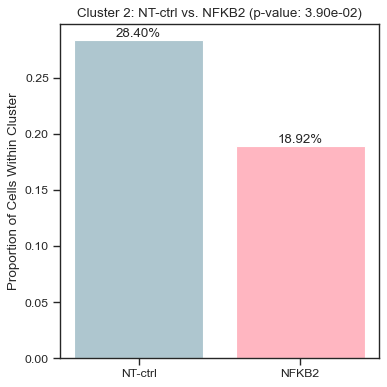

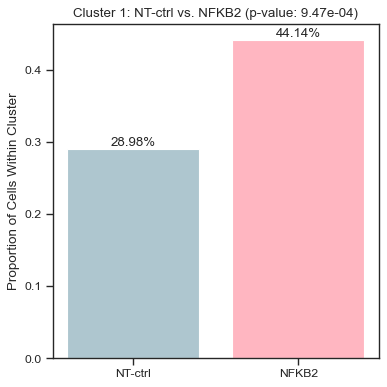

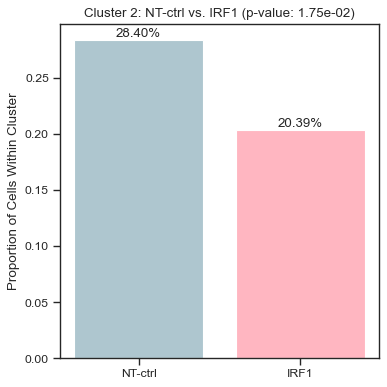

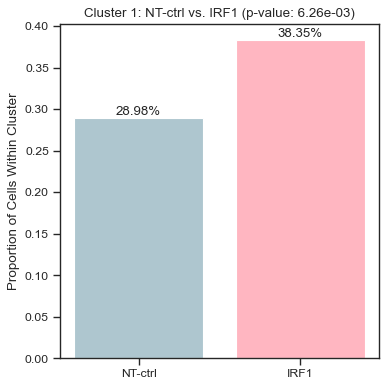

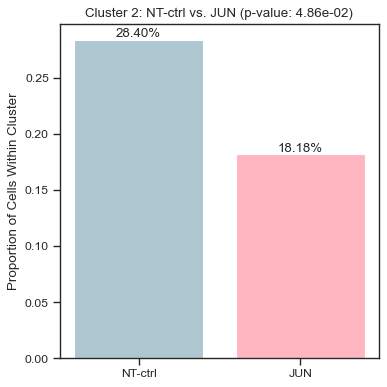

In [12]:
output_dir = "/Users/brendamelano/Desktop/"
os.makedirs(output_dir, exist_ok=True)

# Assuming adata is your AnnData object
significance_threshold = 0.05

# Unique genes excluding 'control'
unique_genes = adata.obs['Gene'].unique()
unique_genes = unique_genes[unique_genes != 'NT-ctrl']

# Iterate over each unique gene
for gene in unique_genes:
    # Iterate over each cluster
    for cluster in adata.obs['leiden'].unique():
        # Construct a contingency table
        contingency_table = pd.DataFrame(
            [
                [
                    ((adata.obs['Gene'] == gene) & (adata.obs['leiden'] == cluster)).sum(),
                    ((adata.obs['Gene'] == gene) & (adata.obs['leiden'] != cluster)).sum(),
                ],
                [
                    ((adata.obs['Gene'] == 'NT-ctrl') & (adata.obs['leiden'] == cluster)).sum(),
                    ((adata.obs['Gene'] == 'NT-ctrl') & (adata.obs['leiden'] != cluster)).sum(),
                ],
            ],
            index=[f"{gene}", "NT-ctrl"],
            columns=[f"In_Cluster_{cluster}", f"Outside_Cluster_{cluster}"]
        )

        # Adjust for zeros if necessary
        epsilon = 1e-10
        contingency_table += epsilon

        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        is_significant = p < significance_threshold

        # Only plot if the result is significant
        if is_significant:
            # Cells for the gene of interest within and outside the cluster
            gene_in_cluster = ((adata.obs['Gene'] == gene) & (adata.obs['leiden'] == cluster)).sum()
            gene_total = (adata.obs['Gene'] == gene).sum()
            prop_gene_in_cluster = gene_in_cluster / gene_total

            # Cells for the control within and outside the cluster
            control_in_cluster = ((adata.obs['Gene'] == 'NT-ctrl') & (adata.obs['leiden'] == cluster)).sum()
            control_total = (adata.obs['Gene'] == 'NT-ctrl').sum()
            prop_control_in_cluster = control_in_cluster / control_total

            # Plotting
            categories = ['NT-ctrl', gene]
            proportions = [prop_control_in_cluster, prop_gene_in_cluster]
            plt.figure(figsize=(5, 5))
            bars = plt.bar(categories, proportions, color=['#aec6cf', '#ffb6c1'])

            plt.ylabel('Proportion of Cells Within Cluster')
            plt.title(f'Cluster {cluster}: NT-ctrl vs. {gene} (p-value: {p:.2e})')

            # Annotate bars with their respective percentages
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom')

            # Use tight_layout() before saving
            plt.tight_layout()

            # Construct a unique filename for each plot
            filename = f"{gene}_vs_NT-ctrl_cluster_{cluster}.svg"
            filepath = os.path.join(output_dir, filename)

            # Save the plot as an SVG file
            plt.savefig(filepath, format='svg')

            # Optionally, display the plot
            plt.show()

            # Close the plot after saving and displaying to free memory and ensure the next plot is fresh
            plt.close()
            # Setup figure and axis manually

       

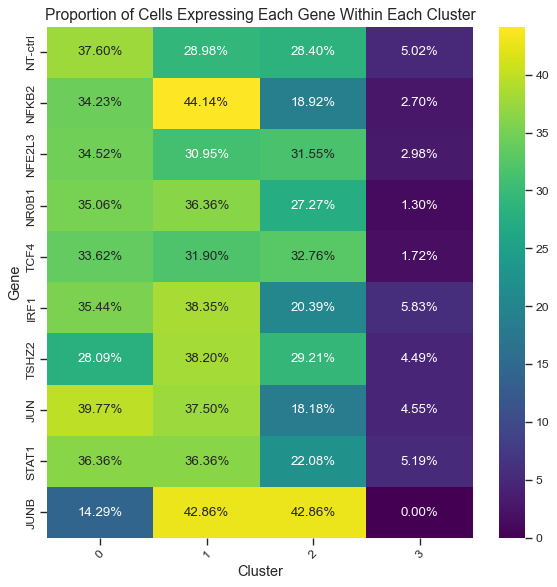

In [9]:
clusters_sorted = sorted(adata.obs['leiden'].unique())
gene_clusters = pd.DataFrame(columns=clusters_sorted)

# First, ensure 'NT-ctrl' is included at the beginning of the genes list
unique_genes = np.append('NT-ctrl', adata.obs['Gene'].unique())

# Fill the DataFrame
for gene in unique_genes:
    percentages = []
    gene_total = (adata.obs['Gene'] == gene).sum()  # Total cells expressing the gene across all clusters
    if gene_total == 0:  # Handle 'NT-ctrl' and any gene not found to avoid division by zero
        percentages = [0 for _ in clusters_sorted]
    else:
        for cluster in clusters_sorted:
            gene_in_cluster = ((adata.obs['Gene'] == gene) & (adata.obs['leiden'] == cluster)).sum()
            prop_gene_in_cluster = gene_in_cluster / gene_total  # Proportion of cells in this cluster for the gene
            percentages.append(prop_gene_in_cluster)
    gene_clusters.loc[gene] = percentages

# Convert to percentages
gene_clusters *= 100

# Convert each value to a string with a percentage sign for annotation
gene_clusters_str = gene_clusters.applymap(lambda x: "{:.2f}%".format(x))

# Plotting the heatmap
plt.figure(figsize=(7.5,7.5))
sns.heatmap(gene_clusters, annot=gene_clusters_str, fmt="s", cmap='viridis')
plt.title('Proportion of Cells Expressing Each Gene Within Each Cluster', fontsize=14)
plt.ylabel('Gene', fontsize=13)
plt.xlabel('Cluster', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()

# Adjust the file path for saving the figure as needed
plt.savefig('/Users/brendamelano/Desktop/OS384_Percent_in_cluster_per_target.svg', format='svg')
plt.show()

# Visualizing cells from a certain target

In [16]:
adata.obs['TCF4'] = pd.Categorical(adata.obs['Gene'].apply(lambda x: 1 if x == 'TCF4' else 0))


adata = adata[adata.obs['TCF4'].sort_values(ascending=False).index]


# Define a custom color palette where 'False' is gray and 'True' is the default color (e.g., orange)
custom_palette = ['#808080', 'orange']  # gray for 'False', orange for 'True'


# Reorder data so that 'True' values are plotted last (on top)
adata_temp = adata[adata.obs['TCF4'].sort_values().index]
# Plot the UMAP with the custom color palette and increased dot size
sc.pl.umap(adata_temp, color='TCF4', palette=custom_palette, 
           add_outline=True, s=30, title='OS384 TCF4 perturbed cells')

# ,        save = "OS384_depleted_barcodes.svg"

# DGEA

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devd

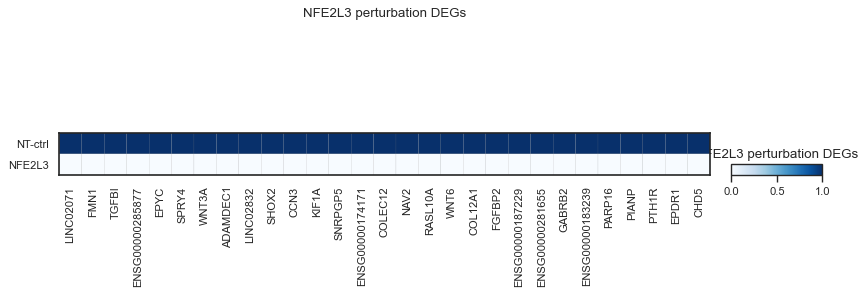

In [3]:
def perform_dge_analysis_and_visualize_heatmap(adata, gene_of_interest, control='NT-ctrl', output_file='/Users/brendamelano/Desktop/heatmap.svg'):
    # Filter the data for the specified gene and control
    adata_filtered = adata[adata.obs['Gene'].isin([control, gene_of_interest])].copy()

    # Create a grouping variable
    adata_filtered.obs['group'] = adata_filtered.obs['Gene']

    # Perform differential gene expression analysis directly comparing 'control' vs the specified gene
    sc.tl.rank_genes_groups(adata_filtered, groupby='group', groups=[gene_of_interest], reference=control)

    # Access the differential expression results
    results = adata_filtered.uns['rank_genes_groups']

    # Extract the names, log fold changes, and p-values for the specified gene group
    gene_names = results['names'][gene_of_interest]
    logfoldchanges = results['logfoldchanges'][gene_of_interest]
    pvals = results['pvals'][gene_of_interest]
    pvals_adj = results['pvals_adj'][gene_of_interest]

    # Create a DataFrame
    df = pd.DataFrame({
        'Gene': gene_names,
        'Log2 fold change': logfoldchanges,
        'P-value': pvals,
        'Adjusted P-value': pvals_adj
    })

    # Filter the DataFrame for significant log fold changes and adjusted p-values
    significant_genes = df[((df['Log2 fold change'] > 1) | (df['Log2 fold change'] < -1)) & (df['Adjusted P-value']< 0.05)]

    # Check if significant_genes is empty
    if significant_genes.empty:
        print("No significant genes found with the given criteria.")
        return df  # Return the full dataframe for further inspection

    # Normalize the data
    sc.pp.scale(adata_filtered)

    # Ensure only the specified groups are included
    adata_filtered.obs['group'] = pd.Categorical(
        adata_filtered.obs['group'],
        categories=[control, gene_of_interest]
    )

    # Create the matrixplot for all genes in the group
    ax = sc.pl.matrixplot(
        adata_filtered,
        var_names=significant_genes['Gene'],
        groupby='group',
        cmap="Blues",
        standard_scale="var",
        colorbar_title="column scaled\nexpression",
        title=f"{gene_of_interest} perturbation DEGs",
        show=False  # Do not display the plot immediately
    )

    # Set the title
    plt.title(f"{gene_of_interest} perturbation DEGs")

    # Save the plot as an SVG file
    plt.savefig(output_file, format='svg')

    # Show the plot
    plt.show()

    return significant_genes



In [ ]:

significant_genes = perform_dge_analysis_and_visualize_heatmap(adata, gene_of_interest='NFE2L3')

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


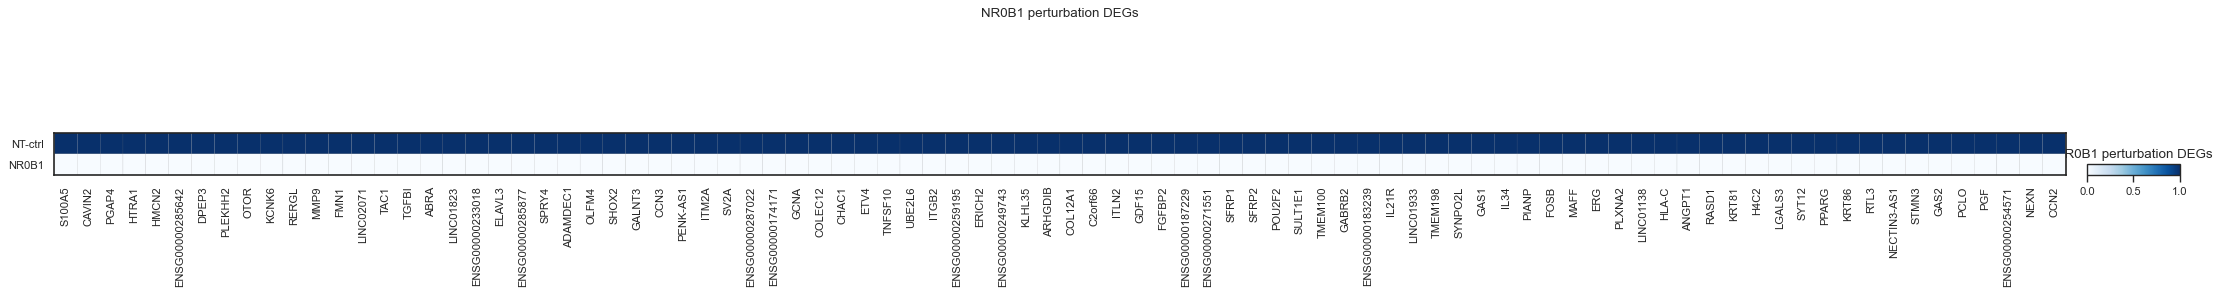

In [4]:

significant_genes = perform_dge_analysis_and_visualize_heatmap(adata, gene_of_interest='NR0B1')